**DL Project:**

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=dc0cc1ca734b653aae64ce1939229b9dd4be8cec71dadea9c773fc6f30a5ba1f
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
import wandb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch.nn as net
import torchvision.datasets as td
import torch.utils.data as tud
import torchvision.transforms as tr
import torch.optim as opt
from torchvision.datasets import ImageFolder
from torch.autograd import Variable
import torch
import torchvision
import torch.nn.functional as fn
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.models as models

In [ ]:
import os
import cv2
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

In [ ]:
#! unzip /content/drive/MyDrive/Dataset/TrafficNet_data-20230509T224710Z-001.zip 

Archive:  /content/drive/MyDrive/Dataset/TrafficNet_data-20230509T224710Z-001.zip
  inflating: TrafficNet_data/trafficnet_dataset_v1/test/sparse_traffic/images_009.jpg  
  inflating: TrafficNet_data/trafficnet_dataset_v1/test/sparse_traffic/images_054.jpg  
  inflating: TrafficNet_data/trafficnet_dataset_v1/test/sparse_traffic/images.jpg  
  inflating: TrafficNet_data/trafficnet_dataset_v1/test/sparse_traffic/images_067.jpg  
  inflating: TrafficNet_data/trafficnet_dataset_v1/test/sparse_traffic/images_040.jpg  
  inflating: TrafficNet_data/trafficnet_dataset_v1/test/sparse_traffic/images_066.jpg  
  inflating: TrafficNet_data/trafficnet_dataset_v1/test/sparse_traffic/images_063.jpg  
  inflating: TrafficNet_data/trafficnet_dataset_v1/test/sparse_traffic/images_005.jpg  
  inflating: TrafficNet_data/trafficnet_dataset_v1/test/sparse_traffic/images_007.jpg  
  inflating: TrafficNet_data/trafficnet_dataset_v1/test/sparse_traffic/images_058.jpg  
  inflating: TrafficNet_data/trafficnet_da

In [ ]:
#!unzip -o /content/drive/MyDrive/DL_Project/trafficnet_dataset_v1.zip -d /content/drive/MyDrive/DL_Project/TrafficNet_data

In [ ]:
import cv2

class Binary_Thresh_dataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.classes = os.listdir(root_dir)
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}
        self.images = []
        self.labels = []
        for cls_name in self.classes:
            cls_dir = os.path.join(root_dir, cls_name)
            for img_name in os.listdir(cls_dir):
                img_path = os.path.join(cls_dir, img_name)
                self.images.append(img_path)
                self.labels.append(self.class_to_idx[cls_name])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]
        img = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, img_thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
        img_resized = cv2.resize(img_thresh, (100, 100), interpolation=cv2.INTER_LINEAR)
        tensor_img = torch.tensor(img_resized)
        tensor_img = tensor_img.unsqueeze(0)
        return tensor_img, label

In [ ]:
import cv2

class thresh_dataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.classes = os.listdir(root_dir)
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}
        self.images = []
        self.labels = []
        for cls_name in self.classes:
            cls_dir = os.path.join(root_dir, cls_name)
            for img_name in os.listdir(cls_dir):
                img_path = os.path.join(cls_dir, img_name)
                self.images.append(img_path)
                self.labels.append(self.class_to_idx[cls_name])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]
        img = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img_gray, (100, 100))#, interpolation=cv2.INTER_LINEAR)
        tensor_img = torch.tensor(img_resized)
        tensor_img = tensor_img.unsqueeze(0)
        
        

        return tensor_img, label


In [ ]:
dttr = thresh_dataset('/content/TrafficNet_data/trafficnet_dataset_v1/train')

In [ ]:
b_dttr = Binary_Thresh_dataset('/content/TrafficNet_data/trafficnet_dataset_v1/train')
b_dtts = Binary_Thresh_dataset('/content/TrafficNet_data/trafficnet_dataset_v1/test')

In [ ]:
len(b_dttr) , len(b_dtts)

(3600, 800)

In [ ]:
b_trld = tud.DataLoader(b_dttr , batch_size = 64 , shuffle = True)
b_tsld = tud.DataLoader(b_dtts , batch_size = 64 , shuffle = True)

In [ ]:
dtts = thresh_dataset('/content/TrafficNet_data/trafficnet_dataset_v1/test')

In [ ]:
trld = tud.DataLoader(dttr , batch_size = 64 , shuffle = True)
tsld = tud.DataLoader(dtts , batch_size = 64 , shuffle = True)

In [ ]:
len(dttr) , len(dtts)

(3600, 800)

In [ ]:
len(b_dttr) , len(b_dtts)

(3600, 800)

In [ ]:
dttr[0][0].shape

torch.Size([1, 100, 100])

In [ ]:
b_dttr[0][0].shape

torch.Size([1, 100, 100])

(<matplotlib.image.AxesImage at 0x7f726f16d0f0>, 2)

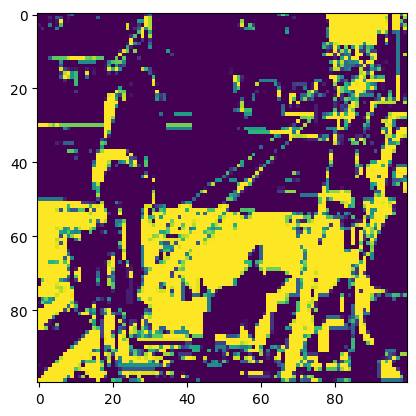

In [ ]:
plt.imshow(b_dttr[2200][0].permute(1,2,0)) , b_dttr[2200][1]

(<matplotlib.image.AxesImage at 0x7f726cdc0550>, 0)

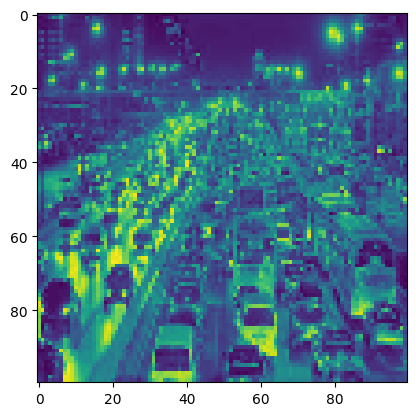

In [ ]:
plt.imshow(dttr[0][0].squeeze(0)) , dttr[0][1]

(<matplotlib.image.AxesImage at 0x7f726ce17f70>, 1)

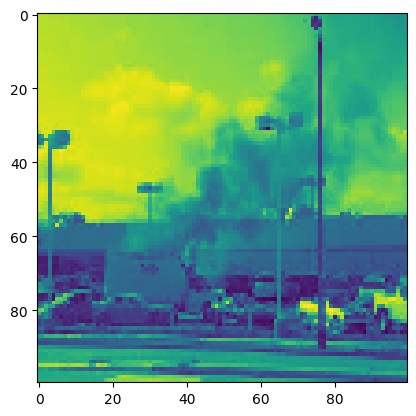

In [ ]:
plt.imshow(dttr[1200][0].squeeze(0)) , dttr[1200][1]

In [ ]:
def device_df():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [ ]:
device = device_df()
device

device(type='cuda')

In [ ]:
import cv2
import numpy as np
import os

knowledge Distillation

In [ ]:
class T_net(net.Module):
  def __init__(self):
    super(T_net, self).__init__()
    self.resnet18 = models.resnet18(pretrained=True)
    # change the first convolution layer to accept 1 input channel instead of 3
    self.resnet18.conv1 = net.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
    self.fc1 = net.Linear(1000, 512)
    self.fc2 = net.Linear(512, 4)

  def forward(self, ip):
    # add a new dimension for the color channel
    x = ip.unsqueeze(1)
    x = self.resnet18(ip)
    x = x.view(x.size(0), -1)
    x = net.ReLU()(self.fc1(x))
    x = self.fc2(x)
    return x

In [ ]:
# tm  - Teacher net model
tm = T_net()
opt = torch.optim.Adam(tm.parameters() , lr = 0.001 , betas = (0.9,0.999))
tm.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:02<00:00, 16.3MB/s]


T_net(
  (resnet18): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

In [ ]:
wandb.init(project = 'Student_Teacher' , name = f'run_ST_1')

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
criterion = net.CrossEntropyLoss()
optimizer = torch.optim.Adam(tm.parameters(), lr=0.001)

def train(model, train_loader, criterion, optimizer, num_epochs):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for i, (inputs, labels) in enumerate(train_loader):
            
            # zero the parameter gradients
            optimizer.zero_grad()

            # move input and target tensors to the same device
            inputs = inputs.to(device)
            inputs = inputs.to(torch.float)
            labels = labels.to(device)

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # calculate running loss
            running_loss += loss.item()
        
        # print statistics
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        wandb.log({'Train_loss ': epoch_loss  , 'Train_acc' : epoch_acc})
        print('[Epoch %d] loss: %.3f, acc: %.3f' % (epoch + 1, epoch_loss, epoch_acc))


# call the train function
train(tm, trld, criterion, optimizer, num_epochs=20)

[Epoch 1] loss: 0.885, acc: 67.889
[Epoch 2] loss: 0.524, acc: 81.556
[Epoch 3] loss: 0.408, acc: 85.861
[Epoch 4] loss: 0.327, acc: 88.722
[Epoch 5] loss: 0.265, acc: 90.944
[Epoch 6] loss: 0.246, acc: 91.639
[Epoch 7] loss: 0.196, acc: 93.528
[Epoch 8] loss: 0.122, acc: 95.917
[Epoch 9] loss: 0.142, acc: 95.361
[Epoch 10] loss: 0.111, acc: 96.361
[Epoch 11] loss: 0.114, acc: 96.361
[Epoch 12] loss: 0.110, acc: 96.500
[Epoch 13] loss: 0.086, acc: 97.167
[Epoch 14] loss: 0.049, acc: 98.500
[Epoch 15] loss: 0.063, acc: 97.694
[Epoch 16] loss: 0.045, acc: 98.556
[Epoch 17] loss: 0.087, acc: 97.028
[Epoch 18] loss: 0.075, acc: 97.083
[Epoch 19] loss: 0.060, acc: 97.722
[Epoch 20] loss: 0.062, acc: 97.917


In [ ]:
class S_net(net.Module):
    def __init__(self):
        super(S_net, self).__init__()
        self.c1 = net.Conv2d(1, 8, kernel_size=3, padding=1, stride=1)
        self.c2 = net.Conv2d(8, 16, kernel_size=3, padding=1, stride=1)
        self.c3 = net.Conv2d(16, 16, kernel_size=3, padding=1, stride=1)
        self.fc1 = net.Linear(16*100*100, 4)
        #self.fc2 = net.Linear(512, 4)

    def forward(self, x):
        x = fn.relu(self.c1(x))
        x = fn.relu(self.c2(x))
        x = fn.relu(self.c3(x))
        x = x.view(-1, 16*100*100)
        #x = fn.relu(self.fc1(x))
        x = self.fc1(x)
        return x


In [ ]:
sm = S_net().to(device)
criterion = net.CrossEntropyLoss()
student_optimizer = torch.optim.Adam(sm.parameters(), lr=0.001)
num_epochs = 20


In [ ]:
# Train the student model using knowledge distillation from the teacher model
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(trld, 0):
        images = images.float().to(device)
        labels = labels.to(device)

        # Forward pass with teacher model
        with torch.no_grad():
            teacher_outputs = tm(images)

        # Forward pass with student model
        student_outputs = sm(images)
        student_outputs = student_outputs.clone().detach().requires_grad_(True)

        # Calculate loss with knowledge distillation
        alpha = 0.5
        T = 1
        soft_teacher_outputs = fn.softmax(teacher_outputs / T, dim=1)
        soft_student_outputs = fn.softmax(student_outputs / T, dim=1)
        loss = (1 - alpha) * criterion(student_outputs, labels) + alpha * T * T * fn.kl_div(soft_teacher_outputs, soft_student_outputs, reduction='batchmean')

        # Backward and optimize
        student_optimizer.zero_grad()
        loss.backward()
        student_optimizer.step()

        # Print loss
        running_loss += loss.item()

    # Print average loss for epoch
    print('[Epoch {}] Average Loss: {:.4f}'.format(epoch+1, running_loss / len(trld)))
    k = running_loss / len(trld)
    wandb.log({'Student_Train_loss ': k })
wandb.finish()


[Epoch 1] Average Loss: 4.0891
[Epoch 2] Average Loss: 4.1121
[Epoch 3] Average Loss: 4.1345
[Epoch 4] Average Loss: 4.1157
[Epoch 5] Average Loss: 4.0877
[Epoch 6] Average Loss: 4.0796
[Epoch 7] Average Loss: 4.1042
[Epoch 8] Average Loss: 4.1002
[Epoch 9] Average Loss: 4.1075
[Epoch 10] Average Loss: 4.1023
[Epoch 11] Average Loss: 4.0802
[Epoch 12] Average Loss: 4.1020
[Epoch 13] Average Loss: 4.0965
[Epoch 14] Average Loss: 4.0812
[Epoch 15] Average Loss: 4.1250


Student_Train_loss,▂▅█▆▂▁▄▄▅▄▁▄▃▁▇
Train_acc,▁▄▅▆▆▆▇▇▇▇▇█████████
Train_loss,█▅▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁
Student_Train_loss,4.12501
Train_acc,97.91667
Train_loss,0.06189


In [ ]:
#Evaluate the student model on the test set
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in b_tsld:
        images = images.float().to(device)
        labels = labels.to(device)
        outputs = sm(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Student Model Accuracy on Test Images: %d %%' % (100 * correct / total))

Student Model Accuracy on Test Images: 27 %


In [ ]:
wandb.init(project = 'Student_teacher_ensemble' , name = 'run_1')

wandb: Currently logged in as: m22cs056. Use `wandb login --relogin` to force relogin


In [ ]:
wandb.finish()

Student Tacher Model with Ensembling

In [ ]:
# Define the number of models in the ensemble
num_models = 5

# Define parameters for each model
models_params = [
    {'num_epochs': 10, 'learning_rate': 0.01},
    {'num_epochs': 20, 'learning_rate': 0.001},
    {'num_epochs': 5, 'learning_rate': 0.05},
    {'num_epochs': 15, 'learning_rate': 0.002},
    {'num_epochs': 8, 'learning_rate': 0.03}
]

# Create a list to store the models
student_models = []

# Train each model in the ensemble with its own set of parameters
for i in range(num_models):
    # Create a new instance of the student model
    student_model = S_net().to(device)

    # Get the parameters for the current model
    model_params = models_params[i]

    # Set up the optimizer with the learning rate for this model
    student_optimizer = torch.optim.Adam(student_model.parameters(), lr=model_params['learning_rate'])
    wandb.init(project = 'ST_ensemble' , name = f'Student model {i+1}')

    # Train the model using the parameters from the dictionary
    for epoch in range(model_params['num_epochs']):
        running_loss = 0.0
        for j, (images, labels) in enumerate(trld, 0):
            images = images.float().to(device)
            labels = labels.to(device)

            # Forward pass with teacher model
            with torch.no_grad():
                teacher_outputs = tm(images)

            # Forward pass with student model
            student_outputs = student_model(images)
            student_outputs = student_outputs.clone().detach().requires_grad_(True)

            # Calculate loss with knowledge distillation
            alpha = 0.5
            T = 1
            soft_teacher_outputs = fn.softmax(teacher_outputs / T, dim=1)
            soft_student_outputs = fn.softmax(student_outputs / T, dim=1)
            loss = (1 - alpha) * criterion(student_outputs, labels) + alpha * T * T * fn.kl_div(soft_teacher_outputs, soft_student_outputs, reduction='batchmean')

            # Backward and optimize
            student_model.zero_grad()
            loss.backward()
            student_optimizer.step()

            # Print loss
            running_loss += loss.item()

        # Print average loss for epoch
        print('[Model {} Epoch {}] Average Loss: {:.4f}'.format(i+1, epoch+1, running_loss / len(trld)))
        wandb.log({'Student_Train_loss ': k })
    wandb.finish()

    # Add the trained model to the list of models
    student_models.append(student_model)

# Make predictions using the ensemble of models
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tsld:
        images = images.float().to(device)
        labels = labels.to(device)

        # Compute predictions of each model in the ensemble
        predictions = []
        for student_model in student_models:
            outputs = student_model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.append(predicted.cpu().numpy())

        # Combine the predictions using voting
        combined_predictions = np.vstack(predictions)
        final_predictions = []
        for j in range(combined_predictions.shape[1]):
            counts = np.bincount(combined_predictions[:, j])
            final_predictions.append(np.argmax(counts))
        final_predictions = np.array(final_predictions)

        # Compute accuracy
        total += labels.size(0)
        correct += (final_predictions == labels.cpu().numpy()).sum().item()

    print('Accuracy of the ensemble of models on the test images: {:.2f} %'.format(100 * correct/total))


[Model 1 Epoch 1] Average Loss: 1.8523
[Model 1 Epoch 2] Average Loss: 1.8581
[Model 1 Epoch 3] Average Loss: 1.8560
[Model 1 Epoch 4] Average Loss: 1.8671
[Model 1 Epoch 5] Average Loss: 1.8597
[Model 1 Epoch 6] Average Loss: 1.8728
[Model 1 Epoch 7] Average Loss: 1.8552
[Model 1 Epoch 8] Average Loss: 1.8611
[Model 1 Epoch 9] Average Loss: 1.8749
[Model 1 Epoch 10] Average Loss: 1.8577


Student_Train_loss,▁▁▁▁▁▁▁▁▁▁
Student_Train_loss,4.12501


[Model 2 Epoch 1] Average Loss: 1.0924
[Model 2 Epoch 2] Average Loss: 1.0876
[Model 2 Epoch 3] Average Loss: 1.0851
[Model 2 Epoch 4] Average Loss: 1.0847
[Model 2 Epoch 5] Average Loss: 1.0818
[Model 2 Epoch 6] Average Loss: 1.0945
[Model 2 Epoch 7] Average Loss: 1.0902
[Model 2 Epoch 8] Average Loss: 1.0887
[Model 2 Epoch 9] Average Loss: 1.0913
[Model 2 Epoch 10] Average Loss: 1.0819
[Model 2 Epoch 11] Average Loss: 1.0899
[Model 2 Epoch 12] Average Loss: 1.0896
[Model 2 Epoch 13] Average Loss: 1.0820
[Model 2 Epoch 14] Average Loss: 1.0850
[Model 2 Epoch 15] Average Loss: 1.0892
[Model 2 Epoch 16] Average Loss: 1.0901
[Model 2 Epoch 17] Average Loss: 1.0948
[Model 2 Epoch 18] Average Loss: 1.0940
[Model 2 Epoch 19] Average Loss: 1.0912
[Model 2 Epoch 20] Average Loss: 1.0829


Student_Train_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Student_Train_loss,4.12501


[Model 3 Epoch 1] Average Loss: 0.8029
[Model 3 Epoch 2] Average Loss: 0.8107
[Model 3 Epoch 3] Average Loss: 0.8130
[Model 3 Epoch 4] Average Loss: 0.8086
[Model 3 Epoch 5] Average Loss: 0.8131


Student_Train_loss,▁▁▁▁▁
Student_Train_loss,4.12501


[Model 4 Epoch 1] Average Loss: 0.1464
[Model 4 Epoch 2] Average Loss: 0.1500
[Model 4 Epoch 3] Average Loss: 0.1487
[Model 4 Epoch 4] Average Loss: 0.1484
[Model 4 Epoch 5] Average Loss: 0.1456
[Model 4 Epoch 6] Average Loss: 0.1472
[Model 4 Epoch 7] Average Loss: 0.1482
[Model 4 Epoch 8] Average Loss: 0.1491
[Model 4 Epoch 9] Average Loss: 0.1503
[Model 4 Epoch 10] Average Loss: 0.1473
[Model 4 Epoch 11] Average Loss: 0.1506
[Model 4 Epoch 12] Average Loss: 0.1490
[Model 4 Epoch 13] Average Loss: 0.1493
[Model 4 Epoch 14] Average Loss: 0.1464
[Model 4 Epoch 15] Average Loss: 0.1475


Student_Train_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Student_Train_loss,4.12501


[Model 5 Epoch 1] Average Loss: 2.1402
[Model 5 Epoch 2] Average Loss: 2.1279
[Model 5 Epoch 3] Average Loss: 2.1284
[Model 5 Epoch 4] Average Loss: 2.1409
[Model 5 Epoch 5] Average Loss: 2.1322
[Model 5 Epoch 6] Average Loss: 2.1364
[Model 5 Epoch 7] Average Loss: 2.1299
[Model 5 Epoch 8] Average Loss: 2.1353


Student_Train_loss,▁▁▁▁▁▁▁▁
Student_Train_loss,4.12501


Accuracy of the ensemble of models on the test images: 25.00 %


In [ ]:
wandb.finish()

Transfer Learning

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models

# Load pre-trained model
pretrained_model = models.vgg16(pretrained=True)
pretrained_model.features[0] = nn.Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
pretrained_model.classifier = nn.Sequential(
    nn.Linear(25088, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 4)
)
pretrained_model.to(device)

# Freeze some layers
for param in pretrained_model.features.parameters():
    param.requires_grad = False

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(pretrained_model.classifier.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:34<00:00, 16.2MB/s]


In [ ]:
wandb.init(project = 'Transfer_lrg' , name = 'run_t1')
# Train the model
for epoch in range(2):
    print('Epoch  - ',epoch + 1)
    running_loss = 0.0
    for i, data in enumerate(trld, 0):
        inputs, lables = data
        inputs = inputs.float().to(device)
        lables = lables.to(device)
        optimizer.zero_grad()
        outputs = pretrained_model(inputs)
        loss = criterion(outputs, lables.data)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # if i % 8 == 7:
        #   print(f'Step {i}   \t loss - {loss.item():0.4f}')
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(trld)))

# Fine-tune the model
for param in pretrained_model.features.parameters():
    param.requires_grad = True

optimizer = optim.SGD(pretrained_model.parameters(), lr=0.0001, momentum=0.9)
print('\n\nFine Tuning \n\n')
for epoch in range(10):
    print('Epoch  - ',epoch + 1)
    running_loss = 0.0
    for i, data in enumerate(trld, 0):
        inputs, lables = data
        inputs = inputs.float().to(device)
        lables = lables.to(device)
        optimizer.zero_grad()
        outputs = pretrained_model(inputs)
        loss = criterion(outputs, lables.data)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(trld)))
    k = running_loss / len(trld)
    wandb.log({'train loss': k})

Epoch  -  1
Epoch 1 loss: 2.194
Epoch  -  2
Epoch 2 loss: 1.151


Fine Tuning 


Epoch  -  1
Epoch 1 loss: 1.024
Epoch  -  2
Epoch 2 loss: 0.890
Epoch  -  3
Epoch 3 loss: 0.805
Epoch  -  4
Epoch 4 loss: 0.739
Epoch  -  5
Epoch 5 loss: 0.675
Epoch  -  6
Epoch 6 loss: 0.629
Epoch  -  7
Epoch 7 loss: 0.610
Epoch  -  8
Epoch 8 loss: 0.558
Epoch  -  9
Epoch 9 loss: 0.527
Epoch  -  10
Epoch 10 loss: 0.512


In [ ]:
# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for data in b_tsld:
        inputs, lables = data
        inputs = inputs.float().to(device)
        lables = lables.to(device)
        outputs = pretrained_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == lables).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 89 %


All the models applied on processed images using binary threshold.

In [ ]:
import cv2

class Binary_Thresh_dataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.classes = os.listdir(root_dir)
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}
        self.images = []
        self.labels = []
        for cls_name in self.classes:
            cls_dir = os.path.join(root_dir, cls_name)
            for img_name in os.listdir(cls_dir):
                img_path = os.path.join(cls_dir, img_name)
                self.images.append(img_path)
                self.labels.append(self.class_to_idx[cls_name])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]
        img = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, img_thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
        img_resized = cv2.resize(img_thresh, (100, 100), interpolation=cv2.INTER_LINEAR)
        tensor_img = torch.tensor(img_resized)
        tensor_img = tensor_img.unsqueeze(0)
        return tensor_img, label

In [ ]:
img = cv2.imread('/content/drive/MyDrive/DL_Project/TrafficNet_data/trafficnet_dataset_v1/train/fire/images_147 (2).jpg')

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
img_resized = cv2.resize(img_thresh, (100, 100), interpolation=cv2.INTER_LINEAR)
tensor_img = torch.tensor(img_resized)
tensor_img = tensor_img.unsqueeze(0)


In [ ]:
print(tensor_img.shape)

torch.Size([1, 100, 100])


In [ ]:
tensor_img.unique()

tensor([0, 1], dtype=torch.uint8)

Image showing fire is indicated using yellow color

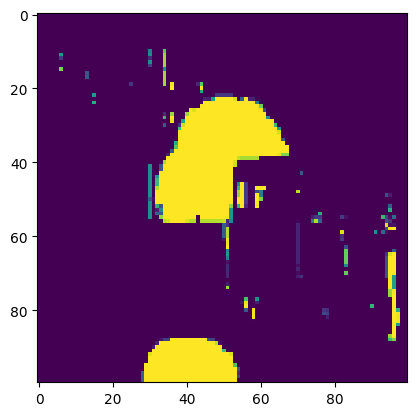

In [ ]:
plt.imshow(tensor_img.permute(1,2,0))

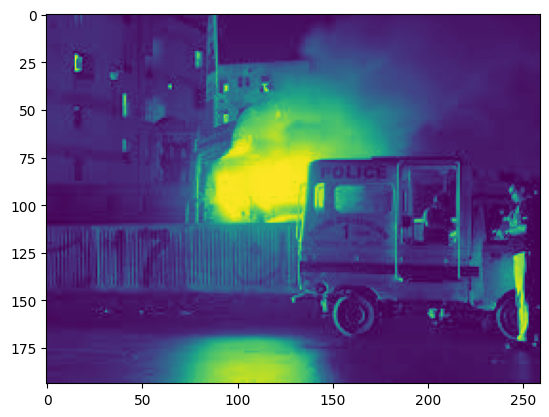

In [ ]:
plt.imshow(img_gray)

In [ ]:
# tm  - Teacher net model
tm = T_net()
opt = torch.optim.Adam(tm.parameters() , lr = 0.001 , betas = (0.9,0.999))
tm.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


T_net(
  (resnet18): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

In [ ]:
wandb.init(project = 'Student_Teacher_Binary' , name = f'run_ST_1')

train loss,█▆▅▄▃▃▂▂▁▁
train loss,0.5117


In [ ]:
criterion = net.CrossEntropyLoss()
optimizer = torch.optim.Adam(tm.parameters(), lr=0.001)

def train(model, train_loader, criterion, optimizer, num_epochs):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for i, (inputs, labels) in enumerate(train_loader):
            
            # zero the parameter gradients
            optimizer.zero_grad()

            # move input and target tensors to the same device
            inputs = inputs.to(device)
            inputs = inputs.to(torch.float)
            labels = labels.to(device)

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # calculate running loss
            running_loss += loss.item()
        
        # print statistics
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        wandb.log({'Train_loss ': epoch_loss  , 'Train_acc' : epoch_acc})
        print('[Epoch %d] loss: %.3f, acc: %.3f' % (epoch + 1, epoch_loss, epoch_acc))


# call the train function
train(tm, b_trld, criterion, optimizer, num_epochs=20)

[Epoch 1] loss: 1.057, acc: 58.611
[Epoch 2] loss: 0.781, acc: 70.583
[Epoch 3] loss: 0.613, acc: 77.528
[Epoch 4] loss: 0.533, acc: 80.528
[Epoch 5] loss: 0.388, acc: 85.639
[Epoch 6] loss: 0.329, acc: 87.889
[Epoch 7] loss: 0.248, acc: 91.333
[Epoch 8] loss: 0.237, acc: 91.611
[Epoch 9] loss: 0.177, acc: 93.444
[Epoch 10] loss: 0.138, acc: 95.639
[Epoch 11] loss: 0.150, acc: 95.222
[Epoch 12] loss: 0.096, acc: 96.639
[Epoch 13] loss: 0.108, acc: 96.250
[Epoch 14] loss: 0.124, acc: 95.556
[Epoch 15] loss: 0.058, acc: 98.500
[Epoch 16] loss: 0.195, acc: 93.833
[Epoch 17] loss: 0.094, acc: 97.111
[Epoch 18] loss: 0.048, acc: 98.389
[Epoch 19] loss: 0.058, acc: 98.083
[Epoch 20] loss: 0.058, acc: 98.444


In [ ]:
sm = S_net().to(device)
criterion = net.CrossEntropyLoss()
student_optimizer = torch.optim.Adam(sm.parameters(), lr=0.001)
num_epochs = 20


In [ ]:
# Train the student model using knowledge distillation from the teacher model
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(b_trld, 0):
        images = images.float().to(device)
        labels = labels.to(device)

        # Forward pass with teacher model
        with torch.no_grad():
            teacher_outputs = tm(images)

        # Forward pass with student model
        student_outputs = sm(images)
        student_outputs = student_outputs.clone().detach().requires_grad_(True)

        # Calculate loss with knowledge distillation
        alpha = 0.5
        T = 1
        soft_teacher_outputs = fn.softmax(teacher_outputs / T, dim=1)
        soft_student_outputs = fn.softmax(student_outputs / T, dim=1)
        loss = (1 - alpha) * criterion(student_outputs, labels) + alpha * T * T * fn.kl_div(soft_teacher_outputs, soft_student_outputs, reduction='batchmean')

        # Backward and optimize
        student_optimizer.zero_grad()
        loss.backward()
        student_optimizer.step()

        # Print loss
        running_loss += loss.item()

    # Print average loss for epoch
    print('[Epoch {}] Average Loss: {:.4f}'.format(epoch+1, running_loss / len(b_trld)))
    k = running_loss / len(b_trld)
    wandb.log({'Student_Train_loss ': k })
wandb.finish()


[Epoch 1] Average Loss: 2.2290
[Epoch 2] Average Loss: 2.2429
[Epoch 3] Average Loss: 2.2318
[Epoch 4] Average Loss: 2.2265
[Epoch 5] Average Loss: 2.2278
[Epoch 6] Average Loss: 2.2312
[Epoch 7] Average Loss: 2.2448
[Epoch 8] Average Loss: 2.2446
[Epoch 9] Average Loss: 2.2329
[Epoch 10] Average Loss: 2.2327
[Epoch 11] Average Loss: 2.2370
[Epoch 12] Average Loss: 2.2568
[Epoch 13] Average Loss: 2.2424
[Epoch 14] Average Loss: 2.2452
[Epoch 15] Average Loss: 2.2423
[Epoch 16] Average Loss: 2.2224
[Epoch 17] Average Loss: 2.2452
[Epoch 18] Average Loss: 2.2405
[Epoch 19] Average Loss: 2.2412
[Epoch 20] Average Loss: 2.2345


Student_Train_loss,▂▅▃▂▂▃▆▆▃▃▄█▅▆▅▁▆▅▅▃
Train_acc,▁▃▄▅▆▆▇▇▇▇▇██▇█▇████
Train_loss,█▆▅▄▃▃▂▂▂▂▂▁▁▂▁▂▁▁▁▁
Student_Train_loss,2.23449
Train_acc,98.44444
Train_loss,0.05804


In [ ]:
#Evaluate the student model on the test set
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in b_tsld:
        images = images.float().to(device)
        labels = labels.to(device)
        outputs = sm(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Student Model Accuracy on Test Images: %d %%' % (100 * correct / total))

Student Model Accuracy on Test Images: 26 %


In [ ]:
wandb.init(project = 'binary_Student_teacher_ensemble' , name = 'run_1')

In [ ]:
# Define the number of models in the ensemble
num_models = 5

# Define parameters for each model
models_params = [
    {'num_epochs': 10, 'learning_rate': 0.01},
    {'num_epochs': 20, 'learning_rate': 0.001},
    {'num_epochs': 5, 'learning_rate': 0.05},
    {'num_epochs': 15, 'learning_rate': 0.002},
    {'num_epochs': 8, 'learning_rate': 0.03}
]

# Create a list to store the models
student_models = []

# Train each model in the ensemble with its own set of parameters
for i in range(num_models):
    # Create a new instance of the student model
    student_model = S_net().to(device)

    # Get the parameters for the current model
    model_params = models_params[i]

    # Set up the optimizer with the learning rate for this model
    student_optimizer = torch.optim.Adam(student_model.parameters(), lr=model_params['learning_rate'])
    wandb.init(project = 'ST_ensemble' , name = f'Student model {i+1}')

    # Train the model using the parameters from the dictionary
    for epoch in range(model_params['num_epochs']):
        running_loss = 0.0
        for j, (images, labels) in enumerate(b_trld, 0):
            images = images.float().to(device)
            labels = labels.to(device)

            # Forward pass with teacher model
            with torch.no_grad():
                teacher_outputs = tm(images)

            # Forward pass with student model
            student_outputs = student_model(images)
            student_outputs = student_outputs.clone().detach().requires_grad_(True)

            # Calculate loss with knowledge distillation
            alpha = 0.5
            T = 1
            soft_teacher_outputs = fn.softmax(teacher_outputs / T, dim=1)
            soft_student_outputs = fn.softmax(student_outputs / T, dim=1)
            loss = (1 - alpha) * criterion(student_outputs, labels) + alpha * T * T * fn.kl_div(soft_teacher_outputs, soft_student_outputs, reduction='batchmean')

            # Backward and optimize
            student_model.zero_grad()
            loss.backward()
            student_optimizer.step()

            # Print loss
            running_loss += loss.item()

        # Print average loss for epoch
        print('[Model {} Epoch {}] Average Loss: {:.4f}'.format(i+1, epoch+1, running_loss / len(b_trld)))
        wandb.log({'Student_Train_loss ': k })
    wandb.finish()

    # Add the trained model to the list of models
    student_models.append(student_model)

# Make predictions using the ensemble of models
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in b_tsld:
        images = images.float().to(device)
        labels = labels.to(device)

        # Compute predictions of each model in the ensemble
        predictions = []
        for student_model in student_models:
            outputs = student_model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.append(predicted.cpu().numpy())

        # Combine the predictions using voting
        combined_predictions = np.vstack(predictions)
        final_predictions = []
        for j in range(combined_predictions.shape[1]):
            counts = np.bincount(combined_predictions[:, j])
            final_predictions.append(np.argmax(counts))
        final_predictions = np.array(final_predictions)

        # Compute accuracy
        total += labels.size(0)
        correct += (final_predictions == labels.cpu().numpy()).sum().item()

    print('Accuracy of the ensemble of models on the test images: {:.2f} %'.format(100 * correct/total))


[Model 1 Epoch 1] Average Loss: 1.4744
[Model 1 Epoch 2] Average Loss: 1.4753
[Model 1 Epoch 3] Average Loss: 1.4726
[Model 1 Epoch 4] Average Loss: 1.4710
[Model 1 Epoch 5] Average Loss: 1.4713
[Model 1 Epoch 6] Average Loss: 1.4714
[Model 1 Epoch 7] Average Loss: 1.4807
[Model 1 Epoch 8] Average Loss: 1.4612
[Model 1 Epoch 9] Average Loss: 1.4789
[Model 1 Epoch 10] Average Loss: 1.4794


Student_Train_loss,▁▁▁▁▁▁▁▁▁▁
Student_Train_loss,2.23449


[Model 2 Epoch 1] Average Loss: 1.6279
[Model 2 Epoch 2] Average Loss: 1.6204
[Model 2 Epoch 3] Average Loss: 1.6369
[Model 2 Epoch 4] Average Loss: 1.6233
[Model 2 Epoch 5] Average Loss: 1.6297
[Model 2 Epoch 6] Average Loss: 1.6214
[Model 2 Epoch 7] Average Loss: 1.6212
[Model 2 Epoch 8] Average Loss: 1.6358
[Model 2 Epoch 9] Average Loss: 1.6234
[Model 2 Epoch 10] Average Loss: 1.6172
[Model 2 Epoch 11] Average Loss: 1.6216
[Model 2 Epoch 12] Average Loss: 1.6346
[Model 2 Epoch 13] Average Loss: 1.6222
[Model 2 Epoch 14] Average Loss: 1.6293
[Model 2 Epoch 15] Average Loss: 1.6302
[Model 2 Epoch 16] Average Loss: 1.6219
[Model 2 Epoch 17] Average Loss: 1.6169
[Model 2 Epoch 18] Average Loss: 1.6205
[Model 2 Epoch 19] Average Loss: 1.6263
[Model 2 Epoch 20] Average Loss: 1.6237


Student_Train_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Student_Train_loss,2.23449


[Model 3 Epoch 1] Average Loss: 1.7558
[Model 3 Epoch 2] Average Loss: 1.7494
[Model 3 Epoch 3] Average Loss: 1.7445
[Model 3 Epoch 4] Average Loss: 1.7485
[Model 3 Epoch 5] Average Loss: 1.7535


Student_Train_loss,▁▁▁▁▁
Student_Train_loss,2.23449


[Model 4 Epoch 1] Average Loss: 2.0395
[Model 4 Epoch 2] Average Loss: 2.0316
[Model 4 Epoch 3] Average Loss: 2.0442
[Model 4 Epoch 4] Average Loss: 2.0431
[Model 4 Epoch 5] Average Loss: 2.0353
[Model 4 Epoch 6] Average Loss: 2.0421
[Model 4 Epoch 7] Average Loss: 2.0287
[Model 4 Epoch 8] Average Loss: 2.0242
[Model 4 Epoch 9] Average Loss: 2.0347
[Model 4 Epoch 10] Average Loss: 2.0276
[Model 4 Epoch 11] Average Loss: 2.0279
[Model 4 Epoch 12] Average Loss: 2.0419
[Model 4 Epoch 13] Average Loss: 2.0408
[Model 4 Epoch 14] Average Loss: 2.0389
[Model 4 Epoch 15] Average Loss: 2.0262


Student_Train_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Student_Train_loss,2.23449


[Model 5 Epoch 1] Average Loss: 4.2656
[Model 5 Epoch 2] Average Loss: 4.2696
[Model 5 Epoch 3] Average Loss: 4.2697
[Model 5 Epoch 4] Average Loss: 4.2617
[Model 5 Epoch 5] Average Loss: 4.2681
[Model 5 Epoch 6] Average Loss: 4.2802
[Model 5 Epoch 7] Average Loss: 4.2886
[Model 5 Epoch 8] Average Loss: 4.2860


Student_Train_loss,▁▁▁▁▁▁▁▁
Student_Train_loss,2.23449


Accuracy of the ensemble of models on the test images: 25.50 %


In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models

# Load pre-trained model
pretrained_model = models.vgg16(pretrained=True)
pretrained_model.features[0] = nn.Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
pretrained_model.classifier = nn.Sequential(
    nn.Linear(25088, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 4)
)
pretrained_model.to(device)

# Freeze some layers
for param in pretrained_model.features.parameters():
    param.requires_grad = False

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(pretrained_model.classifier.parameters(), lr=0.001, momentum=0.9)

In [ ]:
wandb.init(project = 'binary_Transfer_lrg' , name = 'run_tl1')
# Train the model
for epoch in range(1):
    print('Epoch  - ',epoch + 1)
    running_loss = 0.0
    for i, data in enumerate(b_trld, 0):
        inputs, lables = data
        inputs = inputs.float().to(device)
        lables = lables.to(device)
        optimizer.zero_grad()
        outputs = pretrained_model(inputs)
        loss = criterion(outputs, lables.data)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # if i % 8 == 7:
        #   print(f'Step {i}   \t loss - {loss.item():0.4f}')
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(b_trld)))

# Fine-tune the model
for param in pretrained_model.features.parameters():
    param.requires_grad = True

optimizer = optim.SGD(pretrained_model.parameters(), lr=0.0001, momentum=0.9)
print('Fine Tuning ')
for epoch in range(3):
    print('Epoch  - ',epoch + 1)
    running_loss = 0.0
    for i, data in enumerate(b_trld, 0):
        inputs, lables = data
        inputs = inputs.float().to(device)
        lables = lables.to(device)
        optimizer.zero_grad()
        outputs = pretrained_model(inputs)
        loss = criterion(outputs, lables.data)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(b_trld)))
    k = running_loss / len(b_trld)
    wandb.log({'train loss':k})
wandb.finish()

Epoch  -  1
Epoch 1 loss: 1.757
Fine Tuning 
Epoch  -  1
Epoch 1 loss: 1.127
Epoch  -  2
Epoch 2 loss: 1.018
Epoch  -  3
Epoch 3 loss: 0.986


train loss,█▃▁
train loss,0.98587


In [ ]:
# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for data in b_tsld:
        inputs, lables = data
        inputs = inputs.float().to(device)
        lables = lables.to(device)
        outputs = pretrained_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == lables).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 68 %
